In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

2023-10-24 20:06:01.474718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 20:06:01.689784: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 20:06:01.779929: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 20:06:02.324526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
def is_folder_empty(folder_path):
    # Check if the folder is empty
    return not any(os.listdir(folder_path))

def delete_empty_folders(directory_path):
    for root, dirs, files in os.walk(directory_path, topdown=False):
        for folder in dirs:
            folder_path = os.path.join(root, folder)
            if is_folder_empty(folder_path):
                os.rmdir(folder_path)
                print(f"Deleted empty folder: {folder_path}")

In [3]:
root = "images/"
for folder in os.listdir(root):
    dir = os.path.join(root, folder)
    
    if is_folder_empty(dir):
        print("removed folder ", dir)
        os.rmdir(dir)

In [4]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [500, 800])

    #Cropping the image to have only one side of banknote
    height, width, channels = image.shape
    boxes = tf.constant([[0.0, 0.0, 0.5, 1]])  # [y1, x1, y2, x2]
    image = tf.image.crop_and_resize(image[tf.newaxis, ...], boxes, [0], [height//2, width])

    image = (tf.cast(image, tf.float32) / 255.0)# Normalize to the range [0, 1]
    image = tf.squeeze(image, axis=0)
    label = 1 #adding true label for real images
    return image, label


In [5]:
def create_dataset_from_directory(directory_path):
    folder_paths = [os.path.join(directory_path, folder) for folder in os.listdir(directory_path)]
    image_paths = [os.path.join(folder, file) for folder in folder_paths for file in os.listdir(folder)]
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset


In [6]:
dataset = create_dataset_from_directory("images/")
shuffled_dataset = dataset.shuffle(buffer_size=200)


2023-10-24 20:06:03.194209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-24 20:06:03.220031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-24 20:06:03.220156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-24 20:06:03.221685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

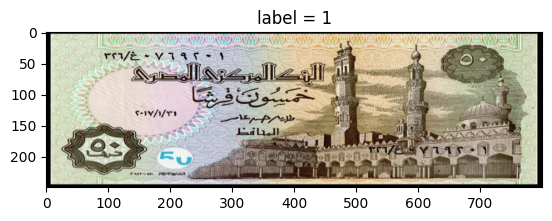

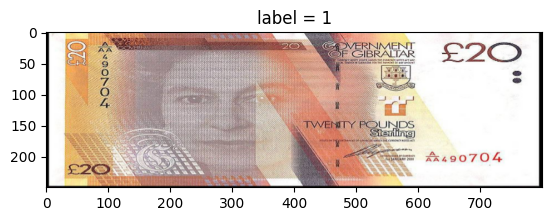

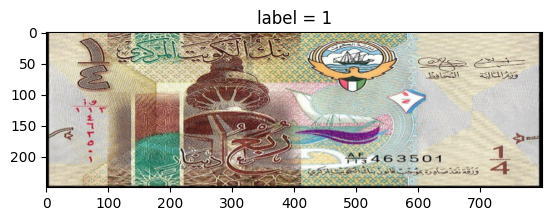

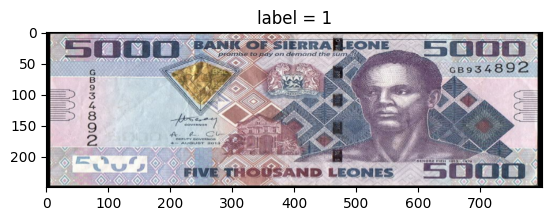

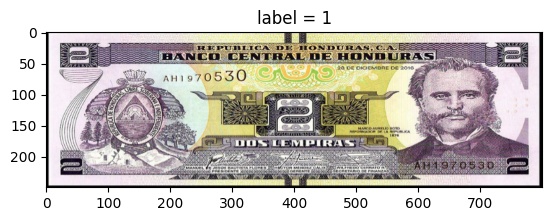

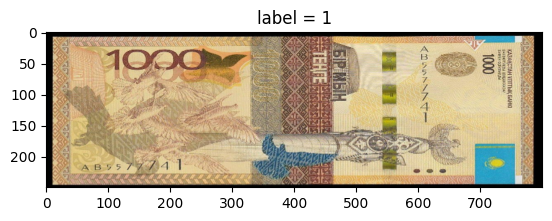

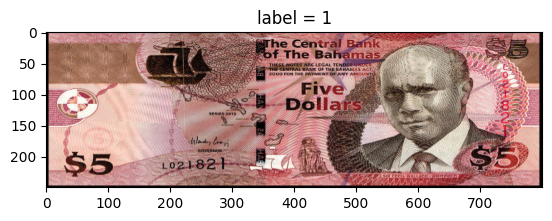

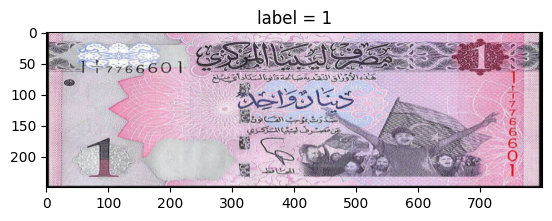

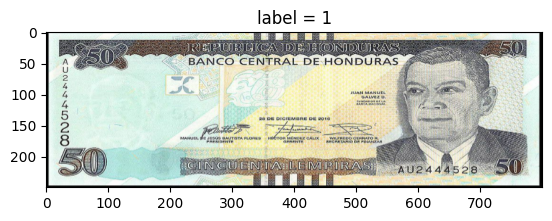

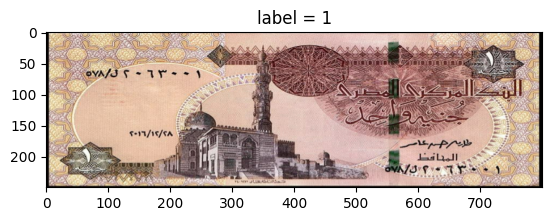

In [7]:
for image, label in shuffled_dataset.take(10):
    plt.figure()
    plt.title(f"label = {label}")
    plt.imshow(image)